        date  user_hits
0 2023-01-01         96
1 2023-01-02        107
2 2023-01-03         88
3 2023-01-04        103
4 2023-01-05        111


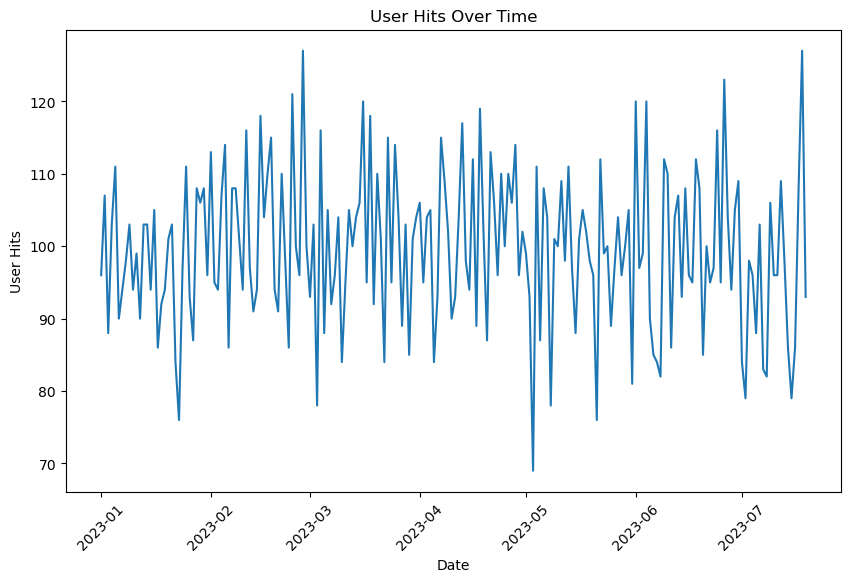

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Generate sample data
np.random.seed(42)
dates = pd.date_range(start='2023-01-01', periods=200, freq='D')
user_hits = np.random.poisson(lam=100, size=len(dates))

# Create a DataFrame
data = {'date': dates, 'user_hits': user_hits}
df = pd.DataFrame(data)

# Display the first few rows of the DataFrame
print(df.head())

# Plotting user hits over time
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='date', y='user_hits')
plt.title('User Hits Over Time')
plt.xlabel('Date')
plt.ylabel('User Hits')
plt.xticks(rotation=45)
plt.show()


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import KMeans
from scipy.optimize import linprog
from scipy.integrate import quad
from scipy.misc import derivative
from scipy.integrate import solve_ivp, solve_bvp
from keras.models import Model
from keras.layers import Input, Dense

# Generate sample data
np.random.seed(42)
user_profiles = pd.DataFrame({
    'user_id': range(1, 101),
    'area': np.random.choice(['Urban', 'Rural'], 100),
    'language': np.random.choice(['English', 'Hindi', 'Spanish'], 100),
    'age': np.random.randint(18, 60, 100)
})

songs = pd.DataFrame({
    'song_id': range(1, 201),
    'title': [f'Song {i}' for i in range(1, 201)],
    'genre': np.random.choice(['Pop', 'Rock', 'Classical', 'Jazz'], 200),
    'language': np.random.choice(['English', 'Hindi', 'Spanish'], 200)
})

user_interactions = pd.DataFrame({
    'user_id': np.random.choice(user_profiles['user_id'], 1000),
    'song_id': np.random.choice(songs['song_id'], 1000),
    'rating': np.random.randint(1, 6, 1000)
})

# Create a user-item matrix
user_item_matrix = user_interactions.pivot_table(index='user_id', columns='song_id', values='rating').fillna(0)

# Method 1: Collaborative Filtering using Cosine Similarity
user_similarity = cosine_similarity(user_item_matrix)
user_similarity_df = pd.DataFrame(user_similarity, index=user_profiles['user_id'], columns=user_profiles['user_id'])

def recommend_songs_cf(user_id, num_recommendations=5):
    similar_users = user_similarity_df[user_id].sort_values(ascending=False).index[1:num_recommendations+1]
    similar_users_interactions = user_interactions[user_interactions['user_id'].isin(similar_users)]
    recommended_songs = similar_users_interactions.groupby('song_id').mean()['rating'].sort_values(ascending=False).index[:num_recommendations]
    return songs[songs['song_id'].isin(recommended_songs)]

# Method 2: Matrix Factorization using SVD
svd = TruncatedSVD(n_components=20)
user_item_matrix_svd = svd.fit_transform(user_item_matrix)

# Method 3: Neural Networks (Autoencoder)
input_layer = Input(shape=(user_item_matrix.shape[1],))
encoded = Dense(128, activation='relu')(input_layer)
encoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(encoded)
decoded = Dense(user_item_matrix.shape[1], activation='sigmoid')(decoded)

autoencoder = Model(input_layer, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(user_item_matrix, user_item_matrix, epochs=50, batch_size=256, shuffle=True)

# Method 4: Association Rule Mining
from mlxtend.frequent_patterns import apriori, association_rules

# Convert user interactions to one-hot encoding
user_interactions_onehot = user_interactions.pivot_table(index='user_id', columns='song_id', values='rating').fillna(0).applymap(lambda x: 1 if x > 0 else 0)
frequent_itemsets = apriori(user_interactions_onehot, min_support=0.01, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

# Method 5: Clustering using K-means
kmeans = KMeans(n_clusters=5)
user_clusters = kmeans.fit_predict(user_item_matrix)

# Method 6: Linear Programming for Scheduling
c = -user_interactions['rating'].values
A = np.ones((1, len(c)))
b = [10]  # Constraint: Recommend 10 songs
bounds = [(0, 1) for _ in range(len(c))]

result = linprog(c, A_eq=A, b_eq=b, bounds=bounds, method='highs')
recommended_indices = np.where(result.x > 0.5)[0]
recommended_songs_lp = user_interactions.iloc[recommended_indices]['song_id'].unique()

# Method 7: Numerical Integration I (Newton-Cotes)
def rating_function(t):
    return np.sin(t) + 2

integral, error = quad(rating_function, 0, 10)

# Method 8: Numerical Integration II (Continuous Equations)
def satisfaction_function(x):
    return np.exp(-x**2)

integral_cont, error_cont = quad(satisfaction_function, -np.inf, np.inf)

# Method 9: Numerical Differentiation
def engagement_function(x):
    return x**3 - 3*x**2 + 2*x

engagement_derivative = derivative(engagement_function, 1.0, dx=1e-6)

# Method 10: ODE I (Runge-Kutta Methods)
def behavior_ode(t, y):
    return -2 * y

solution_ode = solve_ivp(behavior_ode, [0, 10], [1], method='RK45')

# Method 11: ODE II (Boundary-Value Problems)
def retention_ode(x, y):
    return np.vstack((y[1], -y[0]))

def bc(ya, yb):
    return np.array([ya[0] - 1, yb[0] - 2])

x = np.linspace(0, 1, 5)
y = np.zeros((2, x.size))
solution_bvp = solve_bvp(retention_ode, bc, x, y)

# Display results
print("Collaborative Filtering Recommendations for User 1:")
print(recommend_songs_cf(1))

print("\nMatrix Factorization (SVD) Components:")
print(user_item_matrix_svd)

print("\nNeural Network (Autoencoder) Summary:")
autoencoder.summary()

print("\nAssociation Rules:")
print(rules.head())

print("\nK-means Clustering Labels:")
print(user_clusters)

print("\nLinear Programming Recommended Songs:")
print(songs[songs['song_id'].isin(recommended_songs_lp)])

print("\nNumerical Integration I (Newton-Cotes) Result:")
print(integral)

print("\nNumerical Integration II (Continuous Equations) Result:")
print(integral_cont)

print("\nNumerical Differentiation Result:")
print(engagement_derivative)

print("\nODE I (Runge-Kutta) Solution:")
print(solution_ode.y)

print("\nODE II (Boundary-Value Problems) Solution:")
print(solution_bvp.sol(x))


ModuleNotFoundError: No module named 'tensorflow'